In [1]:
import pandas as pd
import numpy as np
!pip install pyodbc
import warnings
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from adjustText import adjust_text
from IPython.display import display,clear_output

Defaulting to user installation because normal site-packages is not writeable


In [2]:
well_dynamic=pd.read_excel("WELL_Dynamics_13.xlsx")
well_dynamic.head()

,WELL,X,Y,MONTH,DAYS,OIL_VOLUME(Kls),GAS_VOLUME(MSCUM),WATER_VOLUME(Kls),YEAR,MONTH_ONLY,OIL Rate (KLpd),GAS RATE (mscm /d),WATER RATE (KLPD),WATER_CUT(%),GOR(scum/kl)
0,15/9-F-1 C,3281111.05,1088223.12,2014-04-01,9.5,11142,1597.937,0,2014,4,1175,169,0.000000,0.000000,143.415635
1,15/9-F-1 C,3281111.05,1088223.12,2014-05-01,30.6,24902,3496.230,783,2014,5,814,114,25.607994,0.030485,140.399566
2,15/9-F-1 C,3281111.05,1088223.12,2014-06-01,29.4,19618,2886.662,2068,2014,6,667,98,70.308583,0.095361,147.143542
3,15/9-F-1 C,3281111.05,1088223.12,2014-07-01,30.9,15086,2249.366,6244,2014,7,488,73,201.848919,0.292733,149.102877
4,15/9-F-1 C,3281111.05,1088223.12,2014-08-01,18.0,6970,1048.191,4530,2014,8,386,58,251.090286,0.393913,150.386083


In [3]:
well_dynamic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   WELL                305 non-null    object        
 1   X                   305 non-null    float64       
 2   Y                   305 non-null    float64       
 3   MONTH               305 non-null    datetime64[ns]
 4   DAYS                305 non-null    float64       
 5   OIL_VOLUME(Kls)     305 non-null    int64         
 6   GAS_VOLUME(MSCUM)   305 non-null    float64       
 7   WATER_VOLUME(Kls)   305 non-null    int64         
 8   YEAR                305 non-null    int64         
 9   MONTH_ONLY          305 non-null    int64         
 10  OIL Rate (KLpd)     305 non-null    int64         
 11  GAS RATE (mscm /d)  305 non-null    int64         
 12  WATER RATE (KLPD)   305 non-null    float64       
 13  WATER_CUT(%)        305 non-null    float64       

In [4]:
well_dynamic

,WELL,X,Y,MONTH,DAYS,OIL_VOLUME(Kls),GAS_VOLUME(MSCUM),WATER_VOLUME(Kls),YEAR,MONTH_ONLY,OIL Rate (KLpd),GAS RATE (mscm /d),WATER RATE (KLPD),WATER_CUT(%),GOR(scum/kl)
0,15/9-F-1 C,3281111.05,1088223.12,2014-04-01,9.5,11142,1597.937,0,2014,4,1175,169,0.000000,0.000000,143.415635
1,15/9-F-1 C,3281111.05,1088223.12,2014-05-01,30.6,24902,3496.230,783,2014,5,814,114,25.607994,0.030485,140.399566
2,15/9-F-1 C,3281111.05,1088223.12,2014-06-01,29.4,19618,2886.662,2068,2014,6,667,98,70.308583,0.095361,147.143542
3,15/9-F-1 C,3281111.05,1088223.12,2014-07-01,30.9,15086,2249.366,6244,2014,7,488,73,201.848919,0.292733,149.102877
4,15/9-F-1 C,3281111.05,1088223.12,2014-08-01,18.0,6970,1048.191,4530,2014,8,386,58,251.090286,0.393913,150.386083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,15/9-F-15 D,3280701.00,1088270.73,2016-05-01,28.2,4699,740.193,6004,2016,5,167,26,212.792517,0.560964,157.521388
301,15/9-F-15 D,3280701.00,1088270.73,2016-06-01,25.2,3464,555.536,5391,2016,6,137,22,213.887315,0.608809,160.374134
302,15/9-F-15 D,3280701.00,1088270.73,2016-07-01,5.8,829,133.160,1172,2016,7,144,23,203.273713,0.585707,160.627262
303,15/9-F-15 D,3280701.00,1088270.73,2016-08-01,0.0,0,0.000,0,2016,8,0,0,0.000000,0.000000,0.000000


In [5]:
df1= well_dynamic.copy()
#calculating oil, gas, water, liquid(water+oil) rates
df1['OIL Rate (KLpd)']= df1['OIL_VOLUME(Kls)']/df1['DAYS']
df1['GAS RATE (mscm /d)']=df1['GAS_VOLUME(MSCUM)']/df1['DAYS']
df1['WATER RATE (KLPD)']=df1['WATER_VOLUME(Kls)']/df1['DAYS']
df1['LIQUID RATE (KLPD)'] = df1['OIL Rate (KLpd)'] + df1['WATER RATE (KLPD)']

In [6]:
df1

,WELL,X,Y,MONTH,DAYS,OIL_VOLUME(Kls),GAS_VOLUME(MSCUM),WATER_VOLUME(Kls),YEAR,MONTH_ONLY,OIL Rate (KLpd),GAS RATE (mscm /d),WATER RATE (KLPD),WATER_CUT(%),GOR(scum/kl),LIQUID RATE (KLPD)
0,15/9-F-1 C,3281111.05,1088223.12,2014-04-01,9.5,11142,1597.937,0,2014,4,1172.842105,168.203895,0.000000,0.000000,143.415635,1172.842105
1,15/9-F-1 C,3281111.05,1088223.12,2014-05-01,30.6,24902,3496.230,783,2014,5,813.790850,114.255882,25.588235,0.030485,140.399566,839.379085
2,15/9-F-1 C,3281111.05,1088223.12,2014-06-01,29.4,19618,2886.662,2068,2014,6,667.278912,98.185782,70.340136,0.095361,147.143542,737.619048
3,15/9-F-1 C,3281111.05,1088223.12,2014-07-01,30.9,15086,2249.366,6244,2014,7,488.220065,72.795016,202.071197,0.292733,149.102877,690.291262
4,15/9-F-1 C,3281111.05,1088223.12,2014-08-01,18.0,6970,1048.191,4530,2014,8,387.222222,58.232833,251.666667,0.393913,150.386083,638.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,15/9-F-15 D,3280701.00,1088270.73,2016-05-01,28.2,4699,740.193,6004,2016,5,166.631206,26.247979,212.907801,0.560964,157.521388,379.539007
301,15/9-F-15 D,3280701.00,1088270.73,2016-06-01,25.2,3464,555.536,5391,2016,6,137.460317,22.045079,213.928571,0.608809,160.374134,351.388889
302,15/9-F-15 D,3280701.00,1088270.73,2016-07-01,5.8,829,133.160,1172,2016,7,142.931034,22.958621,202.068966,0.585707,160.627262,345.000000
303,15/9-F-15 D,3280701.00,1088270.73,2016-08-01,0.0,0,0.000,0,2016,8,NaN,NaN,NaN,0.000000,0.000000,NaN


In [7]:
df=df1.drop(['WELL'], axis=1)
df

,X,Y,MONTH,DAYS,OIL_VOLUME(Kls),GAS_VOLUME(MSCUM),WATER_VOLUME(Kls),YEAR,MONTH_ONLY,OIL Rate (KLpd),GAS RATE (mscm /d),WATER RATE (KLPD),WATER_CUT(%),GOR(scum/kl),LIQUID RATE (KLPD)
0,3281111.05,1088223.12,2014-04-01,9.5,11142,1597.937,0,2014,4,1172.842105,168.203895,0.000000,0.000000,143.415635,1172.842105
1,3281111.05,1088223.12,2014-05-01,30.6,24902,3496.230,783,2014,5,813.790850,114.255882,25.588235,0.030485,140.399566,839.379085
2,3281111.05,1088223.12,2014-06-01,29.4,19618,2886.662,2068,2014,6,667.278912,98.185782,70.340136,0.095361,147.143542,737.619048
3,3281111.05,1088223.12,2014-07-01,30.9,15086,2249.366,6244,2014,7,488.220065,72.795016,202.071197,0.292733,149.102877,690.291262
4,3281111.05,1088223.12,2014-08-01,18.0,6970,1048.191,4530,2014,8,387.222222,58.232833,251.666667,0.393913,150.386083,638.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,3280701.00,1088270.73,2016-05-01,28.2,4699,740.193,6004,2016,5,166.631206,26.247979,212.907801,0.560964,157.521388,379.539007
301,3280701.00,1088270.73,2016-06-01,25.2,3464,555.536,5391,2016,6,137.460317,22.045079,213.928571,0.608809,160.374134,351.388889
302,3280701.00,1088270.73,2016-07-01,5.8,829,133.160,1172,2016,7,142.931034,22.958621,202.068966,0.585707,160.627262,345.000000
303,3280701.00,1088270.73,2016-08-01,0.0,0,0.000,0,2016,8,NaN,NaN,NaN,0.000000,0.000000,NaN


In [8]:
#taking average rate for each month
ave_grouped_rate11 = df.groupby(['MONTH']).mean()
ave_grouped_rate11

,X,Y,DAYS,OIL_VOLUME(Kls),GAS_VOLUME(MSCUM),WATER_VOLUME(Kls),YEAR,MONTH_ONLY,OIL Rate (KLpd),GAS RATE (mscm /d),WATER RATE (KLPD),WATER_CUT(%),GOR(scum/kl),LIQUID RATE (KLPD)
MONTH,,,,,,,,,,,,,,
2008-02-01,3280987.740,1.087831e+06,0.000,0.00,0.00000,0.00,2008.0,2.0,NaN,NaN,NaN,0.000000,0.000000,NaN
2008-02-14,3281547.790,1.088343e+06,16.900,49091.00,7068.00900,413.00,2008.0,2.0,2904.792899,418.225385,24.437870,0.008343,143.977695,2929.230769
2008-03-01,3281267.765,1.088087e+06,13.650,41680.50,6095.58550,13.50,2008.0,3.0,3053.516484,446.563040,0.989011,0.000162,73.122749,3054.505495
2008-04-01,3281267.765,1.088087e+06,12.800,37266.00,5753.22050,241.00,2008.0,4.0,2911.406250,449.470352,18.828125,0.003213,77.191280,2930.234375
2008-05-01,3281267.765,1.088087e+06,14.900,62739.50,9545.93600,8140.00,2008.0,5.0,4210.704698,640.666846,546.308725,0.057421,76.075965,4757.013423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-01,3281122.200,1.088279e+06,30.225,7326.50,1155.81950,51253.25,2016.0,5.0,240.422674,37.927894,1663.764105,0.803036,157.722886,1904.186779
2016-06-01,3281122.200,1.088279e+06,28.550,6634.50,1067.57600,50019.75,2016.0,6.0,228.303732,36.734146,1689.713554,0.817737,160.838383,1918.017286
2016-07-01,3281122.200,1.088279e+06,19.625,5268.75,846.80375,36522.50,2016.0,7.0,217.509494,34.979632,1683.513165,0.815772,161.066419,1901.022660


In [9]:
hi_types = {
    'hi_oil':'OIL Rate (KLpd)',
    'hi_water':'WATER RATE (KLPD)',
    'hi_gas':'GAS RATE (mscm /d)' ,
    'hi_liquid':'LIQUID RATE (KLPD)'}

hi_types.keys()

dict_keys(['hi_oil', 'hi_water', 'hi_gas', 'hi_liquid'])

In [10]:
#function to calcluate HI
def calc_HI(row):
    if row[hi_types[key]] > 0:
        return (row[hi_types[key]]- ave_grouped_rate11.loc[(row['MONTH']),hi_types[key]])/\
             (ave_grouped_rate11.loc[(row['MONTH']),hi_types[key]])
    else:
        return 0
    
for key in hi_types.keys():
    
    df1[key] = df1.apply(lambda row: calc_HI(row),axis=1)
    df1['cum11_' + key] = df1.groupby('WELL')[key].cumsum()

df1.head()

,WELL,X,Y,MONTH,DAYS,OIL_VOLUME(Kls),GAS_VOLUME(MSCUM),WATER_VOLUME(Kls),YEAR,MONTH_ONLY,...,GOR(scum/kl),LIQUID RATE (KLPD),hi_oil,cum11_hi_oil,hi_water,cum11_hi_water,hi_gas,cum11_hi_gas,hi_liquid,cum11_hi_liquid
0,15/9-F-1 C,3281111.05,1088223.12,2014-04-01,9.5,11142,1597.937,0,2014,4,...,143.415635,1172.842105,0.714815,0.714815,0.000000,0.000000,0.675945,0.675945,-0.512859,-0.512859
1,15/9-F-1 C,3281111.05,1088223.12,2014-05-01,30.6,24902,3496.230,783,2014,5,...,140.399566,839.379085,0.433929,1.148744,-0.985056,-0.985056,0.425876,1.101821,-0.631814,-1.144673
2,15/9-F-1 C,3281111.05,1088223.12,2014-06-01,29.4,19618,2886.662,2068,2014,6,...,147.143542,737.619048,0.239238,1.387982,-0.960587,-1.945643,0.238817,1.340638,-0.682495,-1.827168
3,15/9-F-1 C,3281111.05,1088223.12,2014-07-01,30.9,15086,2249.366,6244,2014,7,...,149.102877,690.291262,0.005618,1.393601,-0.881882,-2.827525,0.005316,1.345954,-0.685694,-2.512862
4,15/9-F-1 C,3281111.05,1088223.12,2014-08-01,18.0,6970,1048.191,4530,2014,8,...,150.386083,638.888889,-0.094671,1.298929,-0.859153,-3.686678,-0.119159,1.226795,-0.711501,-3.224363


In [11]:
df1

,WELL,X,Y,MONTH,DAYS,OIL_VOLUME(Kls),GAS_VOLUME(MSCUM),WATER_VOLUME(Kls),YEAR,MONTH_ONLY,...,GOR(scum/kl),LIQUID RATE (KLPD),hi_oil,cum11_hi_oil,hi_water,cum11_hi_water,hi_gas,cum11_hi_gas,hi_liquid,cum11_hi_liquid
0,15/9-F-1 C,3281111.05,1088223.12,2014-04-01,9.5,11142,1597.937,0,2014,4,...,143.415635,1172.842105,0.714815,0.714815,0.000000,0.000000,0.675945,0.675945,-0.512859,-0.512859
1,15/9-F-1 C,3281111.05,1088223.12,2014-05-01,30.6,24902,3496.230,783,2014,5,...,140.399566,839.379085,0.433929,1.148744,-0.985056,-0.985056,0.425876,1.101821,-0.631814,-1.144673
2,15/9-F-1 C,3281111.05,1088223.12,2014-06-01,29.4,19618,2886.662,2068,2014,6,...,147.143542,737.619048,0.239238,1.387982,-0.960587,-1.945643,0.238817,1.340638,-0.682495,-1.827168
3,15/9-F-1 C,3281111.05,1088223.12,2014-07-01,30.9,15086,2249.366,6244,2014,7,...,149.102877,690.291262,0.005618,1.393601,-0.881882,-2.827525,0.005316,1.345954,-0.685694,-2.512862
4,15/9-F-1 C,3281111.05,1088223.12,2014-08-01,18.0,6970,1048.191,4530,2014,8,...,150.386083,638.888889,-0.094671,1.298929,-0.859153,-3.686678,-0.119159,1.226795,-0.711501,-3.224363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,15/9-F-15 D,3280701.00,1088270.73,2016-05-01,28.2,4699,740.193,6004,2016,5,...,157.521388,379.539007,-0.306924,-15.546585,-0.872032,-17.647343,-0.307951,-15.559375,-0.800682,-24.065268
301,15/9-F-15 D,3280701.00,1088270.73,2016-06-01,25.2,3464,555.536,5391,2016,6,...,160.374134,351.388889,-0.397906,-15.944491,-0.873394,-18.520736,-0.399875,-15.959250,-0.816796,-24.882064
302,15/9-F-15 D,3280701.00,1088270.73,2016-07-01,5.8,829,133.160,1172,2016,7,...,160.627262,345.000000,-0.342875,-16.287366,-0.879972,-19.400708,-0.343657,-16.302907,-0.818519,-25.700583
303,15/9-F-15 D,3280701.00,1088270.73,2016-08-01,0.0,0,0.000,0,2016,8,...,0.000000,NaN,0.000000,-16.287366,0.000000,-19.400708,0.000000,-16.302907,0.000000,-25.700583


In [12]:
#function to classify into quadrants
def classify11(df):
    w_dict = {}
    w1_dict = {}
    
    for w in df['WELL'].unique():
        last_cum_hi_oil = df1[(df1['WELL']==w) & (df1['MONTH']==df1[df1['WELL']==w]['MONTH'].max())]['cum11_hi_oil'].iloc[0]
        last_cum_hi_water = df1[(df1['WELL']==w) & (df1['MONTH']==df1[df1['WELL']==w]['MONTH'].max())]['cum11_hi_water'].iloc[0]
        last_cum_hi_liquid = df1[(df1['WELL']==w) & (df1['MONTH']==df1[df1['WELL']==w]['MONTH'].max())]['cum11_hi_liquid'].iloc[0]
        
        if last_cum_hi_oil > 0 and last_cum_hi_water > 0:
            w_dict[w] = 'High Oil and High Water'
        elif last_cum_hi_oil <= 0 and last_cum_hi_water > 0:
            w_dict[w] = 'Low Oil and High Water'
        elif last_cum_hi_oil > 0 and last_cum_hi_water <= 0:
            w_dict[w] = 'High Oil and Low Water'
        elif last_cum_hi_oil <= 0 and last_cum_hi_water <= 0:
            w_dict[w] = 'Low Oil and Low Water'

        if last_cum_hi_oil > 0 and last_cum_hi_liquid > 0:
            w1_dict[w] = 'High Oil and High Liquid'
        elif last_cum_hi_oil <= 0 and last_cum_hi_liquid > 0:
            w1_dict[w] = 'Low Oil and High Liquid'
        elif last_cum_hi_oil > 0 and last_cum_hi_liquid <= 0:
            w1_dict[w] = 'High Oil and Low Liquid'
        elif last_cum_hi_oil <= 0 and last_cum_hi_liquid <= 0:
            w1_dict[w] = 'Low Oil and Low Liquid'
            
    
    return df1['WELL'].map(w_dict), df1['WELL'].map(w1_dict)

df1['class11'], df1['class12'] = classify11(df1)

In [13]:
items = [widgets.Button(description=w) for w in df1['WELL'].unique()]
display(widgets.HBox([items[0],items[1]]))

fmt='%Y-%m-%d'
date_range = pd.date_range(start=df1[df1['WELL']=='15/9-F-12']['MONTH'].min(),end=df1[df1['WELL']=='15/9-F-12']['MONTH'].max(),freq='MS')
options = [(item.strftime(fmt),item) for item in date_range]

slider = widgets.SelectionSlider(
    description='MONTH',
    options=options,
    continuous_update=False
) 

hue_dict = {
    'High Oil and Low Water': 'g',
    'Low Oil and High Water': 'brown',
    'High Oil and High Water': 'b',
    'Low Oil and Low Water': 'r'
}

def update(WELL,MONTH):
    plt.figure(figsize=(10,10))
    plt.xlim(-30,70)
    plt.ylim(-30,130)
    plt.axvline(0,color='black')
    plt.axhline(0,color='black')
    sns.scatterplot('cum_hi_oil','cum_hi_water',data=df1[(df1['HJN023']==WELL)&(df1['MONTH']==MONTH)],
                    hue='class', palette=hue_dict,s=50)
    plt.legend(loc=1)


def scatter(b):
    clear_output(wait=True)
    display(widgets.HBox([items[0],items[1]]))
    interactive_plot = interactive(update,Year=slider,sand=fixed(b.description))
    display(interactive_plot)

    
items[0].on_click(scatter)
items[1].on_click(scatter)


In [14]:
df1['class11'].unique()

array(['Low Oil and Low Water', 'High Oil and Low Water',
       'Low Oil and High Water'], dtype=object)

In [15]:
df1['class12'].unique()

array(['Low Oil and Low Liquid', 'High Oil and Low Liquid',
       'Low Oil and High Liquid'], dtype=object)

In [16]:
#labeling to convert categries to labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le1 = preprocessing.LabelEncoder()

df1['labels1'] = le.fit_transform(df1['class11'].values)
df1['labels2'] = le.fit_transform(df1['class12'].values)
df1.head()

,WELL,X,Y,MONTH,DAYS,OIL_VOLUME(Kls),GAS_VOLUME(MSCUM),WATER_VOLUME(Kls),YEAR,MONTH_ONLY,...,hi_water,cum11_hi_water,hi_gas,cum11_hi_gas,hi_liquid,cum11_hi_liquid,class11,class12,labels1,labels2
0,15/9-F-1 C,3281111.05,1088223.12,2014-04-01,9.5,11142,1597.937,0,2014,4,...,0.000000,0.000000,0.675945,0.675945,-0.512859,-0.512859,Low Oil and Low Water,Low Oil and Low Liquid,2,2
1,15/9-F-1 C,3281111.05,1088223.12,2014-05-01,30.6,24902,3496.230,783,2014,5,...,-0.985056,-0.985056,0.425876,1.101821,-0.631814,-1.144673,Low Oil and Low Water,Low Oil and Low Liquid,2,2
2,15/9-F-1 C,3281111.05,1088223.12,2014-06-01,29.4,19618,2886.662,2068,2014,6,...,-0.960587,-1.945643,0.238817,1.340638,-0.682495,-1.827168,Low Oil and Low Water,Low Oil and Low Liquid,2,2
3,15/9-F-1 C,3281111.05,1088223.12,2014-07-01,30.9,15086,2249.366,6244,2014,7,...,-0.881882,-2.827525,0.005316,1.345954,-0.685694,-2.512862,Low Oil and Low Water,Low Oil and Low Liquid,2,2
4,15/9-F-1 C,3281111.05,1088223.12,2014-08-01,18.0,6970,1048.191,4530,2014,8,...,-0.859153,-3.686678,-0.119159,1.226795,-0.711501,-3.224363,Low Oil and Low Water,Low Oil and Low Liquid,2,2


In [17]:
hue_dict = {
    'High Oil and Low Water': 'lime',
    'Low Oil and High Water': 'blue',
    'High Oil and High Water': 'red',
    'Low Oil and Low Water': 'deeppink'
}

hue_dict2 = {
    'High Oil and Low Liquid': 'lime',
    'Low Oil and High Liquid': 'blue',
    'High Oil and High Liquid': 'red',
    'Low Oil and Low Liquid': 'deeppink'
}

In [18]:
well_dynamic

,WELL,X,Y,MONTH,DAYS,OIL_VOLUME(Kls),GAS_VOLUME(MSCUM),WATER_VOLUME(Kls),YEAR,MONTH_ONLY,OIL Rate (KLpd),GAS RATE (mscm /d),WATER RATE (KLPD),WATER_CUT(%),GOR(scum/kl)
0,15/9-F-1 C,3281111.05,1088223.12,2014-04-01,9.5,11142,1597.937,0,2014,4,1175,169,0.000000,0.000000,143.415635
1,15/9-F-1 C,3281111.05,1088223.12,2014-05-01,30.6,24902,3496.230,783,2014,5,814,114,25.607994,0.030485,140.399566
2,15/9-F-1 C,3281111.05,1088223.12,2014-06-01,29.4,19618,2886.662,2068,2014,6,667,98,70.308583,0.095361,147.143542
3,15/9-F-1 C,3281111.05,1088223.12,2014-07-01,30.9,15086,2249.366,6244,2014,7,488,73,201.848919,0.292733,149.102877
4,15/9-F-1 C,3281111.05,1088223.12,2014-08-01,18.0,6970,1048.191,4530,2014,8,386,58,251.090286,0.393913,150.386083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,15/9-F-15 D,3280701.00,1088270.73,2016-05-01,28.2,4699,740.193,6004,2016,5,167,26,212.792517,0.560964,157.521388
301,15/9-F-15 D,3280701.00,1088270.73,2016-06-01,25.2,3464,555.536,5391,2016,6,137,22,213.887315,0.608809,160.374134
302,15/9-F-15 D,3280701.00,1088270.73,2016-07-01,5.8,829,133.160,1172,2016,7,144,23,203.273713,0.585707,160.627262
303,15/9-F-15 D,3280701.00,1088270.73,2016-08-01,0.0,0,0.000,0,2016,8,0,0,0.000000,0.000000,0.000000


In [19]:
well_loc=well_dynamic[['WELL','X','Y']].drop_duplicates().reset_index(drop=True)
well_loc

,WELL,X,Y
0,15/9-F-1 C,3281111.05,1088223.12
1,15/9-F-11,3281252.27,1088673.98
2,15/9-F-12,3281547.79,1088342.55
3,15/9-F-14,3280987.74,1087830.51
4,15/9-F-15 D,3280701.00,1088270.73


C:\Users\TELESTO\AppData\Local\Temp\ipykernel_16472\891379797.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='cum11_hi_oil',y='cum11_hi_water',data=df1[df1['class11']=='High Oil and High Water'],hue='class11',palette=hue_dict,s=50,marker = 'o')


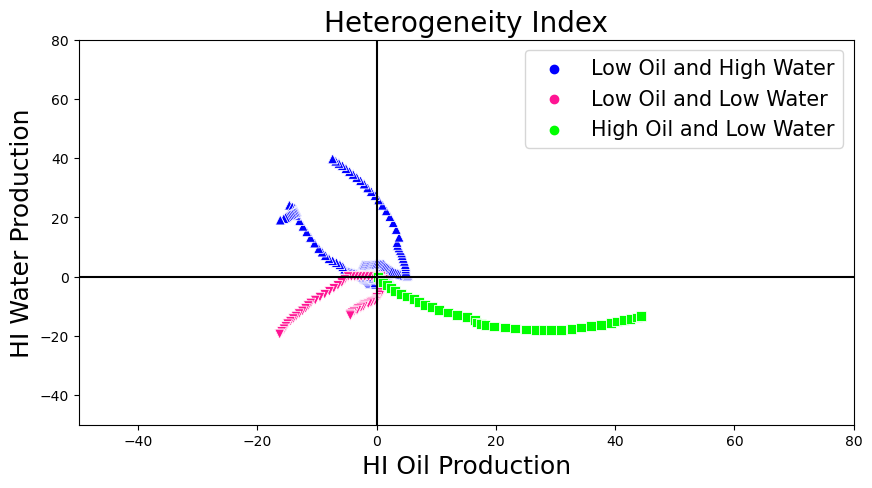

C:\Users\TELESTO\AppData\Local\Temp\ipykernel_16472\891379797.py:34: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='X',y='Y',data=df1[df1['class11']=='High Oil and High Water'],hue='class11',palette=hue_dict,s=50,marker = 'o')


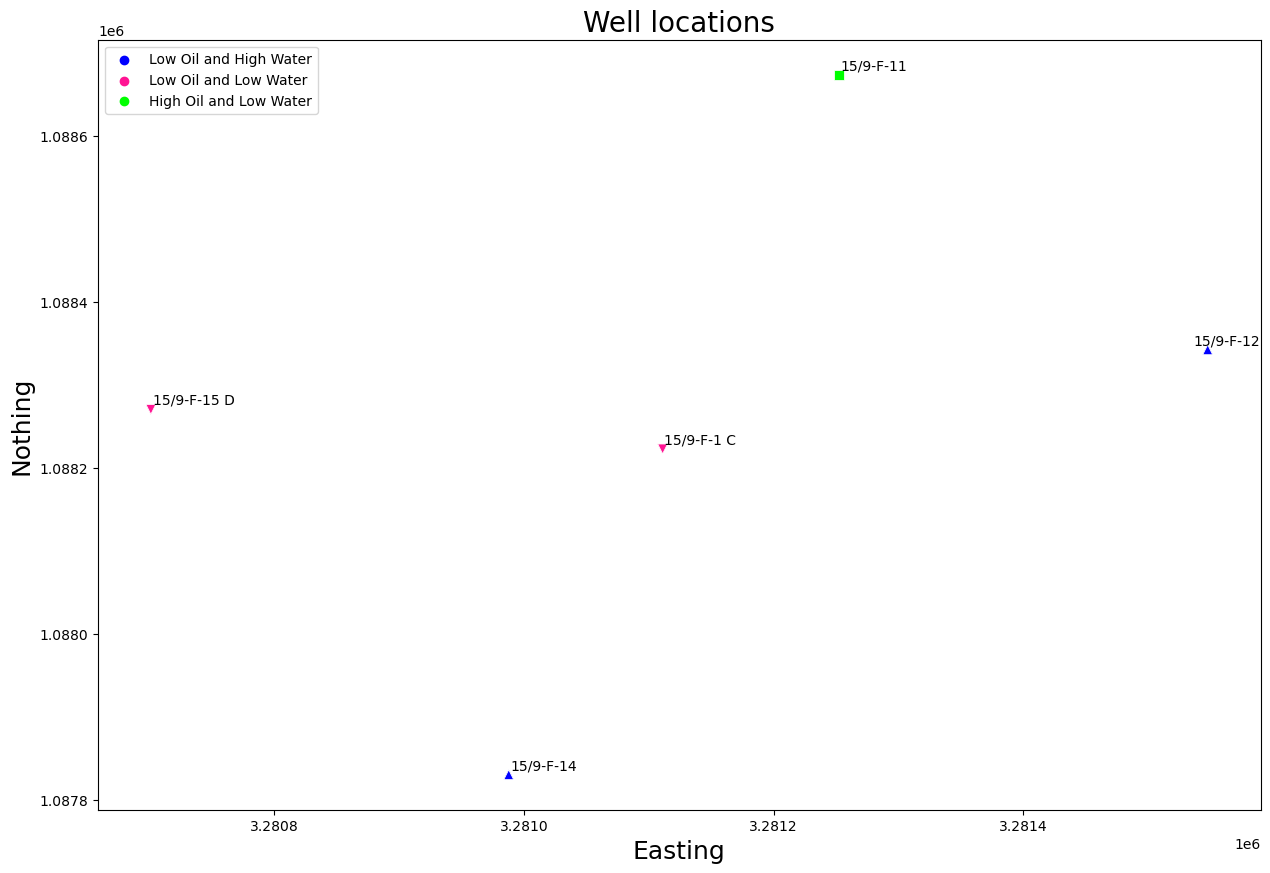

In [31]:

#plotting HI for oil vs. water
plt.figure(figsize=(10,5))

plt.xlim(-50,80)
plt.ylim(-50,80)


plt.axvline(0,color='black')
plt.axhline(0,color='black')
# sns.scatterplot(x='cum11_hi_oil',y='cum11_hi_water',data=df1,hue='class11',palette=hue_dict,s=50,marker = '^')

sns.scatterplot(x='cum11_hi_oil',y='cum11_hi_water',data=df1[df1['class11']=='Low Oil and High Water'],hue='class11',palette=hue_dict,s=50,marker = '^')
sns.scatterplot(x='cum11_hi_oil',y='cum11_hi_water',data=df1[df1['class11']=='Low Oil and Low Water'],hue='class11',palette=hue_dict,s=50,marker = 'v')
sns.scatterplot(x='cum11_hi_oil',y='cum11_hi_water',data=df1[df1['class11']=='High Oil and Low Water'],hue='class11',palette=hue_dict,s=50,marker = 's')
sns.scatterplot(x='cum11_hi_oil',y='cum11_hi_water',data=df1[df1['class11']=='High Oil and High Water'],hue='class11',palette=hue_dict,s=50,marker = 'o')



#plt.scatter(df1['cum11_hi_oil'], df1['cum11_hi_water'], c= k['class11'])
plt.xlabel('HI Oil Production',fontsize=18)
plt.ylabel('HI Water Production',fontsize=18)
plt.title('Heterogeneity Index',fontsize=20)
plt.legend(fontsize = 15)
plt.savefig('hetro_index_cum_water_oil.jpg')
plt.show()


plt.figure(figsize=(15,10))

# sns.scatterplot(x='X',y='Y',data=df1,hue='class11',palette=hue_dict,s=30)
sns.scatterplot(x='X',y='Y',data=df1[df1['class11']=='Low Oil and High Water'],hue='class11',palette=hue_dict,s=50,marker = '^')
sns.scatterplot(x='X',y='Y',data=df1[df1['class11']=='Low Oil and Low Water'],hue='class11',palette=hue_dict,s=50,marker = 'v')
sns.scatterplot(x='X',y='Y',data=df1[df1['class11']=='High Oil and Low Water'],hue='class11',palette=hue_dict,s=50,marker = 's')
sns.scatterplot(x='X',y='Y',data=df1[df1['class11']=='High Oil and High Water'],hue='class11',palette=hue_dict,s=50,marker = 'o')

texts=[]
for i, point in well_loc.iterrows():
    texts.append(plt.text(point['X'], point['Y'],point['WELL']))
adjust_text(texts)

plt.xlabel('Easting',fontsize=18)
plt.ylabel('Nothing',fontsize=18)
plt.title('Well locations',fontsize=20)
plt.legend(fontsize = 10,loc ='upper left')
plt.show()
#plt.scatter(k['X'], k['Y'], c=k['class11'])

C:\Users\TELESTO\AppData\Local\Temp\ipykernel_16472\1753535500.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='cum11_hi_oil',y='cum11_hi_liquid',data=df1[df1['class12']=='High Oil and High Liquid'],hue='class12',palette=hue_dict2,s=50,marker = 'o')


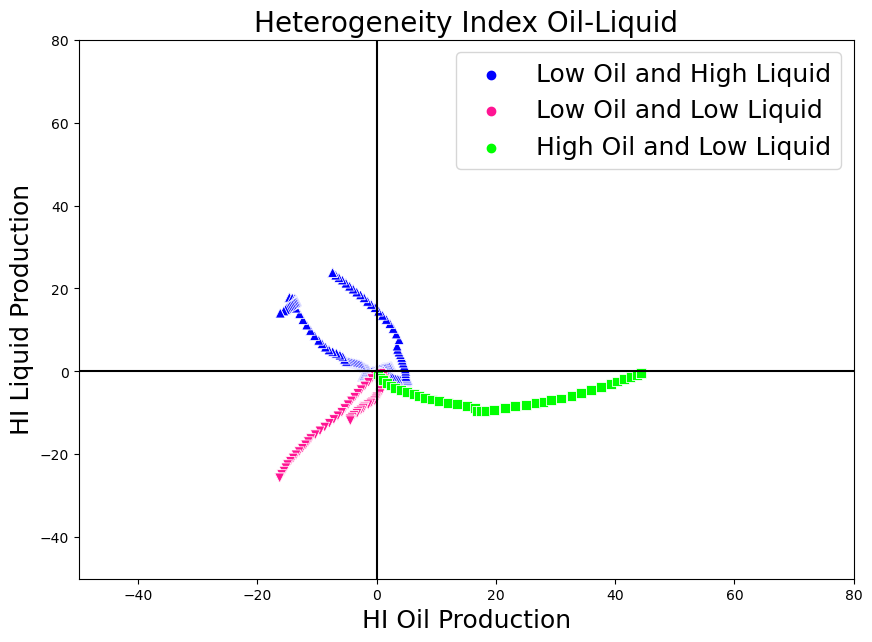

C:\Users\TELESTO\AppData\Local\Temp\ipykernel_16472\1753535500.py:35: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='X',y='Y',data=df1[df1['class12']=='High Oil and High Liquid'],hue='class12',palette=hue_dict2,s=50,marker = 'o')


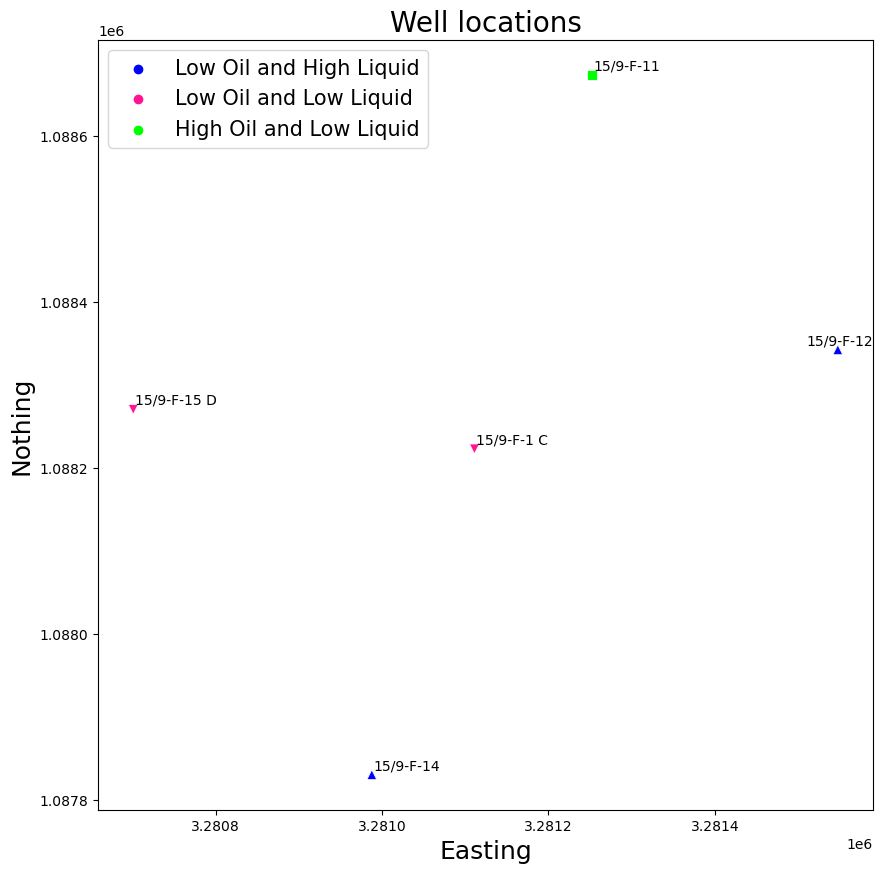

In [30]:
#plotting HI for oil vs. liquid
plt.figure(figsize=(10,7))

plt.xlim(-50,80)
plt.ylim(-50,80)

plt.axvline(0,color='black')
plt.axhline(0,color='black')
# sns.scatterplot(x='cum11_hi_oil',y='cum11_hi_water',data=df1,hue='class11',palette=hue_dict,s=50,marker = '^')

sns.scatterplot(x='cum11_hi_oil',y='cum11_hi_liquid',data=df1[df1['class12']=='Low Oil and High Liquid'],hue='class12',palette=hue_dict2,s=50,marker = '^')
sns.scatterplot(x='cum11_hi_oil',y='cum11_hi_liquid',data=df1[df1['class12']=='Low Oil and Low Liquid'],hue='class12',palette=hue_dict2,s=50,marker = 'v')
sns.scatterplot(x='cum11_hi_oil',y='cum11_hi_liquid',data=df1[df1['class12']=='High Oil and Low Liquid'],hue='class12',palette=hue_dict2,s=50,marker = 's')
sns.scatterplot(x='cum11_hi_oil',y='cum11_hi_liquid',data=df1[df1['class12']=='High Oil and High Liquid'],hue='class12',palette=hue_dict2,s=50,marker = 'o')


#plt.scatter(df1['cum11_hi_oil'], df1['cum11_hi_water'], c= k['class11'])
plt.xlabel('HI Oil Production',fontsize=18)
plt.ylabel('HI Liquid Production',fontsize=18)
plt.title('Heterogeneity Index Oil-Liquid',fontsize=20)
plt.legend(fontsize = 18)
plt.savefig('hetro_index_cum_water_oil.jpg')
plt.show()


plt.figure(figsize=(10,10))
# plt.xlim(-160,280)
# plt.ylim(-160,500)


# sns.scatterplot(x='X',y='Y',data=df1,hue='class11',palette=hue_dict,s=30)
sns.scatterplot(x='X',y='Y',data=df1[df1['class12']=='Low Oil and High Liquid'],hue='class12',palette=hue_dict2,s=50,marker = '^')
sns.scatterplot(x='X',y='Y',data=df1[df1['class12']=='Low Oil and Low Liquid'],hue='class12',palette=hue_dict2,s=50,marker = 'v')
sns.scatterplot(x='X',y='Y',data=df1[df1['class12']=='High Oil and Low Liquid'],hue='class12',palette=hue_dict2,s=50,marker = 's')
sns.scatterplot(x='X',y='Y',data=df1[df1['class12']=='High Oil and High Liquid'],hue='class12',palette=hue_dict2,s=50,marker = 'o')
texts=[]
for i, point in well_loc.iterrows():
    texts.append(plt.text(point['X'], point['Y'],point['WELL']))
adjust_text(texts)

plt.xlabel('Easting',fontsize=18)
plt.ylabel('Nothing',fontsize=18)
plt.title('Well locations',fontsize=20)
plt.legend(fontsize = 15,loc ='upper left')
plt.show()
#plt.scatter(k['X'], k['Y'], c=k['class11'])

In [22]:
print(df1['cum11_hi_oil'].min(),df1['cum11_hi_oil'].max())
print(df1['cum11_hi_water'].min(),df1['cum11_hi_water'].max())
print(df1['cum11_hi_liquid'].min(),df1['cum11_hi_liquid'].max())

-16.287365804197634 44.293961155901854
-19.400708020698485 39.78086343540948
-25.700582856397293 23.86740307922473


In [23]:
items = [widgets.Button(description=w) for w in df['sand'].unique()]
display(widgets.HBox([items[0],items[1]]))

fmt='%Y-%m-%d'
date_range = pd.date_range(start=df[df['sand']=='CHANNEL']['date'].min(),end=df[df['sand']=='CHANNEL']['date'].max(),freq='MS')
options = [(item.strftime(fmt),item) for item in date_range]

slider = widgets.SelectionSlider(
    description='Date',
    options=options,
    continuous_update=False
) 

hue_dict = {
    'High Oil and Low Water': 'g',
    'Low Oil and High Water': 'brown',
    'High Oil and High Water': 'b',
    'Low Oil and Low Water': 'r'
}

def update(sand,date):
    plt.figure(figsize=(10,10))
    plt.xlim(-30,70)
    plt.ylim(-30,130)
    plt.axvline(0,color='black')
    plt.axhline(0,color='black')
    sns.scatterplot('cum_hi_oil','cum_hi_water',data=df[(df['sand']==sand)&(df['date']==date)],
                    hue='class', palette=hue_dict,s=50)
    plt.legend(loc=1)


def scatter(b):
    clear_output(wait=True)
    display(widgets.HBox([items[0],items[1]]))
    interactive_plot = interactive(update,date=slider,sand=fixed(b.description))
    display(interactive_plot)

    
items[0].on_click(scatter)
items[1].on_click(scatter)


KeyError: 'sand'